# 2022 CE888 Project Empathy

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
global_figsize = (10, 5)

## Import the data

In [2]:
# This function returns a single data point from the specified participant and trial.
# The type parameter defines which data set is used, either II or III.
def get_one_data_point(csv_filename):
    """
    Returns two dataframe object containing the data for the specified participant and trial, and the questionnaire data.
    """

    dirname = "./dataset/"
    csv_filename = dirname + csv_filename
    if os.path.isfile(csv_filename) and "csv" in csv_filename:
        df_original_dataset = pd.read_csv(csv_filename)

        if "II" in csv_filename:
            df_original_questionnaire = pd.read_csv(dirname + "Questionnaire_datasetIA.csv")
        elif "III" in csv_filename:
            df_original_questionnaire = pd.read_csv(dirname + "Questionnaire_datasetIB.csv")
        
        return df_original_dataset, df_original_questionnaire
    return None, None

def get_filename_list():
    """
    Returns a list of all the filenames in the current directory.
    """
    filenames = []
    # go into the ./dataset dir and get all the filenames contianing "csv"
    for file in os.listdir("./dataset"):
        if file.endswith(".csv"):
            filenames.append(file)
    return sorted(filenames)


In [3]:
data_set_filenames = get_filename_list()

trian_ratio = 0.8
dev_train_ratio = 0.1
test_train_ratio = 0.1

train_N = int(len(data_set_filenames) * trian_ratio)
dev_N = int(len(data_set_filenames) * dev_train_ratio)
test_N = int(len(data_set_filenames) * test_train_ratio)

train_set = data_set_filenames[0: train_N]
dev_set = data_set_filenames[train_N: train_N + dev_N]
test_set = data_set_filenames[train_N + dev_N: train_N + dev_N + test_N]

In [4]:
df_original_dataset0, df_ground_truth0 = get_one_data_point(train_set[0])
df_original_dataset1, df_ground_truth1 = get_one_data_point(train_set[1])
df_original_dataset2, df_ground_truth2 = get_one_data_point(train_set[2])

## Import the Ground Truth Data

In [5]:
df_original_dataset0.shape

(7466, 71)

In [6]:
list(df_original_dataset0.columns) == list(df_original_dataset1.columns)

True

## Explore the dataset

In [7]:
# questionnaire could be used as the ground truth
scores = df_ground_truth0['Total Score original']
# there are 40 questions and each question worth 5 points
scores.describe()

count     60.000000
mean      94.983333
std       10.058291
min       69.000000
25%       87.750000
50%       95.500000
75%      103.250000
max      115.000000
Name: Total Score original, dtype: float64

In [8]:
df_original_dataset0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7466 entries, 0 to 7465
Data columns (total 71 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           7466 non-null   int64  
 1   Recording timestamp                  7466 non-null   int64  
 2   Computer timestamp                   7466 non-null   int64  
 3   Sensor                               7462 non-null   object 
 4   Project name                         7466 non-null   object 
 5   Export date                          7466 non-null   object 
 6   Participant name                     7466 non-null   object 
 7   Recording name                       7466 non-null   object 
 8   Recording date                       7466 non-null   object 
 9   Recording date UTC                   7466 non-null   object 
 10  Recording start time                 7466 non-null   object 
 11  Recording start time UTC      

In [9]:
df_original_dataset0.describe()

,Unnamed: 0,Recording timestamp,Computer timestamp,Recording duration,Recording resolution height,Recording resolution width,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,...,Presented Media position X (DACSpx),Presented Media position Y (DACSpx),Original Media width,Original Media height,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Mouse position X,Mouse position Y
count,7466.000000,7.466000e+03,7.466000e+03,7466.0,7466.0,7466.0,7.201000e+03,6819.000000,6819.000000,6618.000000,...,7462.0,7462.0,7462.0,7462.0,7465.000000,7465.000000,3959.000000,3959.000000,261.000000,261.000000
mean,6814.500000,5.397491e+07,5.426480e+08,83579.0,1080.0,1920.0,5.398770e+08,1070.355771,253.597742,1034.763373,...,214.0,0.0,897.0,649.0,166.684796,300.552981,1076.629199,210.200556,-803.107280,410.467433
std,2155.392888,1.781100e+07,1.781100e+07,0.0,0.0,0.0,1.732172e+07,273.425806,293.880068,273.195637,...,0.0,0.0,0.0,0.0,216.165831,223.675681,267.885113,290.363388,117.803013,284.483371
min,3082.000000,2.341932e+07,5.120924e+08,83579.0,1080.0,1920.0,5.098806e+08,280.000000,-201.000000,280.000000,...,214.0,0.0,897.0,649.0,8.000000,15.000000,477.000000,-164.000000,-1033.000000,-8.000000
25%,4948.250000,3.849367e+07,5.271667e+08,83579.0,1080.0,1920.0,5.248790e+08,903.000000,-4.000000,866.000000,...,214.0,0.0,897.0,649.0,42.000000,125.000000,894.000000,-94.000000,-869.000000,193.000000
50%,6814.500000,5.404436e+07,5.427174e+08,83579.0,1080.0,1920.0,5.398772e+08,1024.000000,263.000000,992.000000,...,214.0,0.0,897.0,649.0,92.000000,220.000000,1005.000000,228.000000,-842.000000,381.000000
75%,8680.750000,6.959513e+07,5.582682e+08,83579.0,1080.0,1920.0,5.548755e+08,1338.000000,401.000000,1307.000000,...,214.0,0.0,897.0,649.0,192.000000,447.000000,1354.000000,386.000000,-756.000000,639.000000
max,10547.000000,8.343446e+07,5.721075e+08,83579.0,1080.0,1920.0,5.698706e+08,1610.000000,1869.000000,1576.000000,...,214.0,0.0,897.0,649.0,1242.000000,885.000000,1559.000000,999.000000,-501.000000,1036.000000


In [10]:
df_ground_truth0.describe()

,Participant nr,NR,I sometimes find it difficult to see things from the other guys' point of view.,"I am usually objective when I watch a film or play, and I don't often get completely caught up in it.",I try to look at everybody's side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,"When I am upset at someone, I usually try to put myself in his shoes for a while.","Before criticising somebody, I try to imagine how I would feel if I was in their place.",I often get emotionally involved with my friends' problems.,I am inclined to get nervous when others around me seem to be nervous.,...,I complete the sentences of other people when they find it difficult to communicate their ideas to help them.,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other people�s sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original
count,60.000000,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000
mean,30.500000,1.254747e+07,2.316667,2.616667,3.466667,3.483333,3.033333,3.383333,3.216667,2.783333,...,3.300000,2.333333,3.450000,3.416667,2.683333,2.550000,3.066667,2.950000,121.85000,94.983333
std,17.464249,2.213064e+06,0.965361,0.922261,0.595653,0.724666,0.801834,0.715250,0.715250,0.825272,...,0.720169,0.932768,0.746177,0.618683,1.049482,0.998728,0.899466,0.723105,12.01528,10.058291
min,1.000000,9.111416e+06,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,94.00000,69.000000
25%,15.750000,1.091565e+07,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.750000,114.75000,87.750000
50%,30.500000,1.240955e+07,2.000000,3.000000,4.000000,4.000000,3.000000,3.500000,3.000000,3.000000,...,3.000000,2.000000,4.000000,3.000000,3.000000,2.000000,3.000000,3.000000,121.00000,95.500000
75%,45.250000,1.373001e+07,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,131.00000,103.250000
max,60.000000,1.601652e+07,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,143.00000,115.000000


In [11]:
df_original_dataset0.sample(3)

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
2796,5878,46240852,534913923,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,100.0,137.0,1072.0,573.0,"0,5753","0,5303",NaN,NaN
2882,5964,46957465,535630536,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,142.0,140.0,1236.0,570.0,"0,6848","0,5278",NaN,NaN
2955,6037,47565804,536238875,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,192.0,143.0,1273.0,-86.0,NaN,NaN,NaN,NaN


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Recording timestamp'}>,
        <AxesSubplot:title={'center':'Computer timestamp'}>,
        <AxesSubplot:title={'center':'Recording duration'}>,
        <AxesSubplot:title={'center':'Recording resolution height'}>],
       [<AxesSubplot:title={'center':'Recording resolution width'}>,
        <AxesSubplot:title={'center':'Eyetracker timestamp'}>,
        <AxesSubplot:title={'center':'Gaze point X'}>,
        <AxesSubplot:title={'center':'Gaze point Y'}>,
        <AxesSubplot:title={'center':'Gaze point left X'}>],
       [<AxesSubplot:title={'center':'Gaze point left Y'}>,
        <AxesSubplot:title={'center':'Gaze point right X'}>,
        <AxesSubplot:title={'center':'Gaze point right Y'}>,
        <AxesSubplot:title={'center':'Presented Media width'}>,
        <AxesSubplot:title={'center':'Presented Media height'}>],
       [<AxesSubplot:title={'center':'Presented Media position X (DACSpx)'}>,

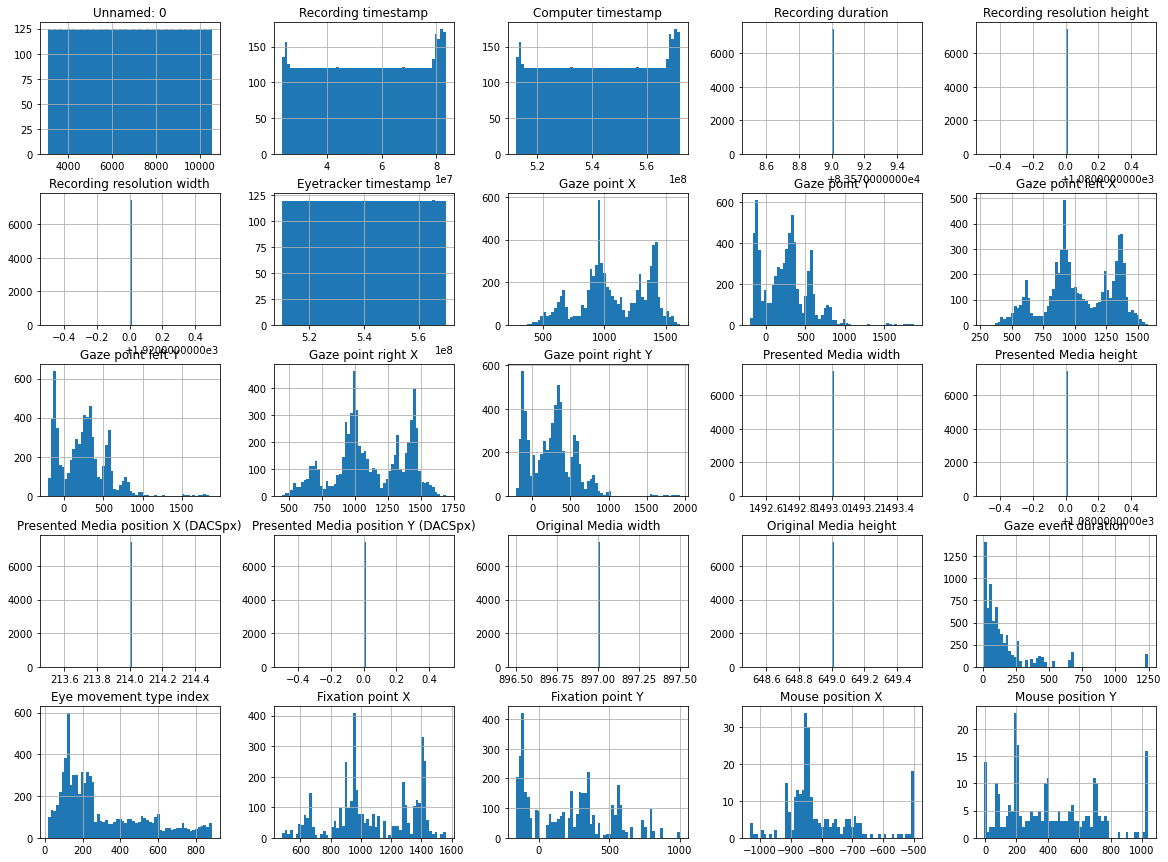

In [12]:
df_original_dataset0.hist(bins=60, figsize=(20, 15))

## Data Pre-posessing

As there are many features in the dataset, to avoid the possibility of model over-fitting, the dimensionality reduction technique, feature extraction would be used in the following tasks.

For some of the columns, the value of the standard deviation is 0, which means they are redundant and could be removed.

In [13]:
from sklearn.preprocessing import StandardScaler

def preprocessing(df_original: pd.DataFrame, scale=False, verbose=False):

    df_preprocessed_dataset = df_original.copy()
    # remove some columns
    # In my mind, there are some columns that apparently would not be useful for modelling.
    columns_to_be_dropped = ["Export date", "Recording name", "Recording date", "Recording date UTC", "Recording start time", "Recording start time", "Recording start time UTC", "Recording software version", "Project name", "Participant name", "Recording Fixation filter name", "Timeline name", "Recording monitor latency", "Eye movement type"]
    # columns_to_be_dropped += ["Eyetracker timestamp", "Computer timestamp", "Recording timestamp"]

    # the media information does not matter
    columns_to_be_dropped += ['Presented Stimulus name', 'Presented Media name', 'Presented Media width', 'Presented Media height']

    # columns with std = 0
    columns_with_zero_std = ["Recording duration", "Recording resolution height", "Recording resolution width"]

    columns_to_be_dropped += columns_with_zero_std

    if verbose:
        print("There would be", len(columns_to_be_dropped), "columns to be dropped.")
        print(df_preprocessed_dataset.shape)

    try:
        df_preprocessed_dataset = df_preprocessed_dataset.drop(columns_to_be_dropped, axis=1)
        # also drop the first unnamed column
        df_preprocessed_dataset.pop(df_preprocessed_dataset.columns[0])
    except KeyError:
        pass

    # replace all the , to . in the number values
    df_preprocessed_dataset = df_preprocessed_dataset.replace(to_replace=r',', value='.', regex=True)


    # remove lines where eye tracker is detected as invalid
    df_preprocessed_dataset = df_preprocessed_dataset[(df_preprocessed_dataset["Validity left"] == "Valid") & (df_preprocessed_dataset["Validity right"] == "Valid")]
    df_preprocessed_dataset.drop(columns=['Validity left', 'Validity right'], inplace=True)

    if verbose:
        print(df_preprocessed_dataset.shape)
        print(df_preprocessed_dataset.columns)

    # one-hot encode some features
    try:
        one_hot1 = pd.get_dummies(df_preprocessed_dataset['Event'])
        one_hot2 = pd.get_dummies(df_preprocessed_dataset['Event value'])
        one_hot3 = pd.get_dummies(df_preprocessed_dataset['Sensor'])

        df_preprocessed_dataset.drop(columns=['Event value', 'Event', 'Sensor'], inplace=True)
        df_preprocessed_dataset = pd.concat([df_preprocessed_dataset, one_hot1, one_hot2, one_hot3], axis=1)

    except KeyError:
        print("KeyError while one-hot encoding.")

    # handle NA
    # Fill all the NaN values using bfill method with limit equals to 1
    df_preprocessed_dataset.fillna(method='bfill', limit=1, inplace=True)

    if verbose:
        print(df_preprocessed_dataset.shape)


    # scale the dataset
    if scale:
        standard_scaler = StandardScaler()
        df_preprocessed_dataset = standard_scaler.fit_transform(df_preprocessed_dataset)


    # return df_preprocessed_dataset
    return df_preprocessed_dataset["Gaze point X"]


In [14]:
df_columns = list(df_original_dataset0.columns)[1:]
len(df_columns)

70

In [15]:
def plot_data_point(preprocessed_dataset, y="Computer timestamp"):
    plt.plot(preprocessed_dataset, label=y)
    plt.title(y + " vs. Gaze point X")
    plt.xlabel("Gaze point X")
    plt.ylabel(y)
    plt.legend()
    plt.rcParams["figure.figsize"] = (3, 3)
    plt.show()


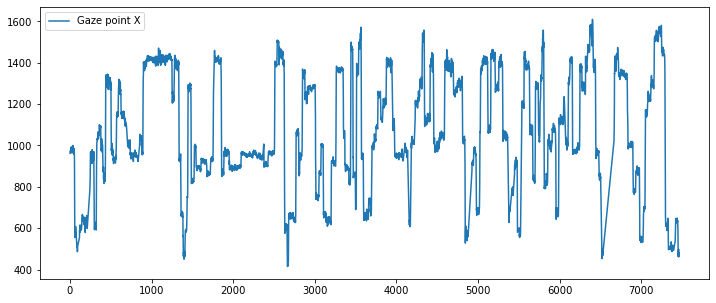

In [16]:
df_preprocessed_datasetX = preprocessing(df_original_dataset0)
# plot_dataset(df_preprocessed_dataset)

# df_preprocessed_datasetX = df_preprocessed_dataset["Gaze point X"]

df_preprocessed_datasetX.iloc[0:10]

def padding_data(data):
    X = np.array(data)
    X.reshape(-1, 1)
    X = np.concatenate((np.array(range(len(X))).reshape(-1, 1), X.reshape(-1, 1)), axis=1)
    return X

# train_X = padding_data(df_preprocessed_datasetX)

plt.rcParams["figure.figsize"] = (12, 5)
plt.plot(df_preprocessed_datasetX, label="Gaze point X")
# set the label to be upper left
plt.rcParams['legend.loc'] = 'upper left'
plt.legend()

For example, check the Gaze point X VS Computer Timestamp.

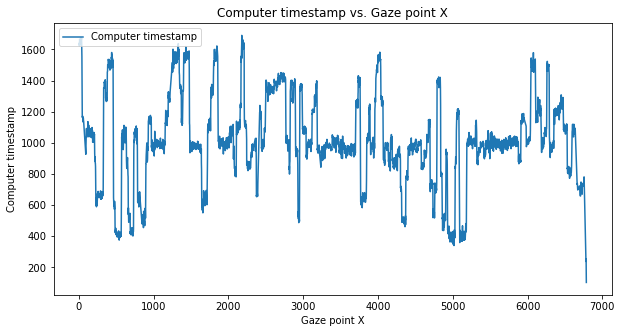

In [17]:
plt.rcParams["figure.figsize"] = global_figsize
df_preprocessed_dataset2 = preprocessing(df_original_dataset2)
plot_data_point(df_preprocessed_dataset2)

## My Understanding of the Signals & Columns
After the above steps (exploration and pre-processing), I found some features are 

- The Recording resolution height and width are used to represent the size of the screen.
- Gaze point X and Y are used to represent the X-Y coordinates on the screen for both eyes.
- Gaze point left X and Y are used to represent the X-Y coordinates on the screen only for the left eye.
- Gaze point righ X and Y are used to represent the X-Y coordinates on the screen only for the right eye.
- Gaze direction left X and Y are used to represent the unit vector represent the direction of the gaze of the left eye.
- Gaze direction right X and Y are used to represent the unit vector represent the direction of the gaze of the right eye, which, I suppose, is usually the same with the left eye.
- Pupil diameter left and right each represents the size of the pupil of the left and right eye correspondingly.
- Validity left and right represent wheather the data collect from left or right eye is valid or not.

There are two coordinate system used, one is Display Area Coordinate System (DACS), and the other is Scene Camera Projects and the Media Coordinate System (MCS).

Then there are 16 signals (X-Y-Z) collected from the left and the right eye using the two coordinate system by different sensors.
- Presented Media position X and Y represents the media position on the screen by the X-Y coordinate.
- Eye movement type represents the string name of the eye movement type.
- Gaze event duration represents the time spent for the current eye movement.
- Fixation point represents the X-Y coordinate where the eye is fixed on the screen.


After I explored and pre-processed the data, I found the the Gaze Point X, the Gaze Point Y, Gaze Point Left X, Gaze Point Left Y, Gaze Point Right X, Gaze Point Right Y and etc. could be used as important features.
The series of time-sequence data could then be fed into a recurrent neural network in order to grab the essence of the eye-tracker data, and then to be used as the input to the next neural network to predict the empathy score.

Actually, only the left eye data is used in the following tasks because the right eye data is usually the same as the left eye data.

## Data Loading and Pre-processing Pipeline

In [18]:
# With the initial design, there is a problem with this implementation of data_loader
# if the batch_size is greater than the participant's actual trail number,
# then other people's data might be included
def data_loader(idx, batch_size, dirname="./dataset/"):
    train_filenames = get_filename_list()

    for i in range(idx, idx + batch_size):
        with open(dirname + train_filenames[i], 'r') as f:
            df_original_dataset = pd.read_csv(f)
            df_preprocessed_dataset = preprocessing(df_original_dataset)
            df_preprocessed_datasetX = df_preprocessed_dataset
            # train_X = padding_data(df_preprocessed_datasetX)
            yield df_preprocessed_datasetX
            # yield train_X

y = data_loader(0, 5)
y.__next__()

2       962.0
3       962.0
4       962.0
5       972.0
6       970.0
        ...  
7459    490.0
7460    498.0
7461    462.0
7462    482.0
7463    480.0
Name: Gaze point X, Length: 6271, dtype: float64

In [19]:
def get_participant_data(participant_i, dirname="./dataset/"):

    data_names = get_filename_list()
    participant_data_names = [data for data in data_names if f"participant_{participant_i}_" in data]
    participant_data = []
    ground_truth = None

    if len(participant_data_names) == 0:
        print("No data for participant", participant_i)
        return [], None

    _, ground_truth = get_one_data_point(participant_data_names[0])

    for data_name in participant_data_names:
        with open(dirname + data_name, 'r') as f:

            df_original_dataset = pd.read_csv(f)
            gaze_point_x  = preprocessing(df_original_dataset)

            # gaze_point_x = df_preprocessed_dataset.fillna(method="ffill")
            # computer_timestamp = df_preprocessed_dataset["Computer timestamp"]

            # train_X = np.concatenate((computer_timestamp.values.reshape(-1, 1), gaze_point_x.values.reshape(-1, 1)), axis=1)
            # adding index
            train_X = padding_data(gaze_point_x)
            participant_data.append(train_X)

    return participant_data, ground_truth



In [20]:
def plot_length_of_participant_data():

    participant_data = [data for i in range(1, 61) for data in get_participant_data(i)[0]]

    shape = [data.shape[0] for data in participant_data]

    # plot the shape of participant_data[i].shape[0]
    for i in range(len(participant_data)):
        plt.plot(range(len(shape)), shape, label=f"Index {i + 1}")
        plt.title("Length of participant data for Gaze Point X")


# plot_length_of_participant_data()


The mean of the Gaze Point X are around 4438, so the tensor size for the input could be set to 4000.

In [21]:
# create dataset with look back = 1

import torch

def create_dataset(i, look_back=1):

    participant_data, ground_truth = get_participant_data(i)
    if participant_data == []:
        raise TypeError

    ground_truth = pd.read_csv("./dataset/Questionnaire_datasetIA.csv", encoding="ISO-8859-1").iloc[i, 46]

    N = len(participant_data[0])
    dataX, dataY = [], []

    for i in range(N - look_back - 1):

        x = participant_data[0][i:(i + look_back), 0]
        dataX.append(x.item())

        dataY.append(participant_data[0][i + look_back, 1].item())

    if len(dataX) < 4000:
        data_x_np = np.pad(np.array(dataX), (0, 4000 - len(dataX)), 'constant')
        data_y_np = np.pad(dataY, 0, (0, 4000 - len(dataY)), 'constant', constant_values=(0, 0))
    else:
        data_x_np = np.array(dataX[:4000], dtype=np.int64)
        data_y_np = np.array(dataY[:4000], dtype=np.float64)
    
    concatentated_data = np.concatenate((data_x_np.reshape(4000, 1), data_y_np.reshape(4000, 1)), axis=1)
    
    return torch.Tensor(concatentated_data), torch.Tensor([ground_truth])

data, gt = create_dataset(2)
data.shape
data[:, 1]

tensor([1238., 1243., 1247.,  ...,  822.,  828.,  813.])

### Visualisation one data point

Text(0.5, 1.0, 'label=tensor([116.])')

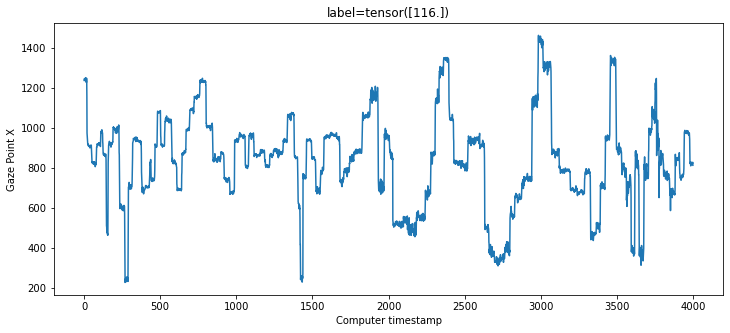

In [22]:
# plot x and y

plt.rcParams["figure.figsize"] = (12, 5)
plt.plot(data[:, 0], data[:, 1])

# x label
plt.xlabel("Computer timestamp")
plt.ylabel("Gaze Point X")

plt.title(f"label={gt}")


In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm
torch.random.manual_seed(123)

class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 2000)
        self.fc2 = nn.Linear(2000, 1)
        self.dropout = nn.Dropout(dropout)

        self.criterion = nn.MSELoss()
        self.train_range = range(1, 51)
        self.eval_range = range(51, 60)
        self.iteration_loss = []

    def forward(self, data):
        embedded = self.dropout(self.embedding(data))
        embedded = embedded.unsqueeze(1)
        lstm_output, (hidden, cell) = self.lstm(embedded)
        output = self.fc2(self.fc(self.dropout(lstm_output[:, -1, :])))
        return output
    
    def start_train(self, lr=5e-4, n_epochs=2):

        optimizer = optim.Adam(self.parameters(), lr=lr)

        for epoch in tqdm(range(n_epochs), desc="Epoch"):
            epoch_loss = 0
            self.train()
            for i in tqdm(self.train_range, desc="Train"):

                try:
                    data, labels = create_dataset(i)
                except TypeError:
                    continue

                data = data.to(torch.int)

                optimizer.zero_grad()

                # Forward pass
                predictions = self.forward(data[:, 1])

                loss = self.criterion(predictions, labels)
                loss.backward()
                optimizer.step()

                with torch.no_grad():
                    print(f"Itteration {i}: RMSE Loss {torch.sqrt(loss).item()}")
                    self.iteration_loss.append(torch.sqrt(loss).item())
                    epoch_loss += torch.sqrt(loss).item()

            print(f'Epoch {epoch + 1}: Loss {epoch_loss / (epoch + 1)}')
            
            # update the learning rate according to the epoch
            if (epoch + 1) / n_epochs == 0.5:

                # update the learning rate of optimizer
                lr /= 5

                for param_group in optimizer.param_groups:
                    param_group['lr'] = lr

                print(f"Learning rate is updated to {lr}")
    
    def evaluate(self, i):

        try:
            data, label = create_dataset(i)
        except TypeError:
            return -1, -1, -1

        self.eval()
        with torch.no_grad():
            data = data.to(torch.int)
            predictions = self.forward(data[:, 1])
            return predictions, label, torch.sqrt(self.criterion(predictions, label))

lstm_model = LSTMModel(4000, 4000, 4000, 1, 2, 0.05)
lstm_model.start_train()

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Itteration 1: RMSE Loss 133.018310546875


Itteration 2: RMSE Loss 115.826416015625


Itteration 3: RMSE Loss 112.51347351074219


Itteration 4: RMSE Loss 134.8674774169922


Itteration 5: RMSE Loss 109.21894073486328


Itteration 6: RMSE Loss 109.404052734375


Itteration 7: RMSE Loss 74.53264617919922


Itteration 8: RMSE Loss 64.12659454345703


Itteration 9: RMSE Loss 56.12438201904297


Itteration 10: RMSE Loss 63.25358581542969


Itteration 11: RMSE Loss 57.43024444580078


Itteration 12: RMSE Loss 48.325069427490234


Itteration 15: RMSE Loss 42.17954635620117


Itteration 17: RMSE Loss 40.560367584228516


No data for participant 19


Itteration 20: RMSE Loss 39.146121978759766


Itteration 22: RMSE Loss 39.67836380004883


Itteration 24: RMSE Loss 41.31379699707031


Itteration 26: RMSE Loss 17.628467559814453


Itteration 28: RMSE Loss 51.89044189453125


Itteration 29: RMSE Loss 25.249238967895508


Itteration 30: RMSE Loss 21.337739944458008


Itteration 32: RMSE Loss 38.51993179321289


Itteration 34: RMSE Loss 30.341154098510742


Itteration 36: RMSE Loss 31.69168472290039


Itteration 38: RMSE Loss 31.201520919799805


Itteration 39: RMSE Loss 19.75306510925293


Itteration 40: RMSE Loss 26.5952205657959


Itteration 42: RMSE Loss 14.534157752990723


Itteration 44: RMSE Loss 15.61219310760498


Itteration 48: RMSE Loss 8.828923225402832


Epoch:  50%|█████     | 1/2 [04:25<04:25, 265.00s/it]

Itteration 50: RMSE Loss 30.362871170043945
Epoch 1: Loss 1645.0660009384155
Learning rate is updated to 0.0001


Itteration 1: RMSE Loss 13.856937408447266


Itteration 2: RMSE Loss 11.396770477294922


Itteration 3: RMSE Loss 10.52811050415039


Itteration 4: RMSE Loss 17.216188430786133


Itteration 5: RMSE Loss 7.526347637176514


Itteration 6: RMSE Loss 8.808014869689941


Itteration 7: RMSE Loss 8.338228225708008


Itteration 8: RMSE Loss 10.962060928344727


Itteration 9: RMSE Loss 7.425210952758789


Itteration 10: RMSE Loss 9.75965690612793


Itteration 11: RMSE Loss 8.29267406463623


Itteration 12: RMSE Loss 17.559036254882812


Itteration 15: RMSE Loss 9.008108139038086


Itteration 17: RMSE Loss 18.175615310668945


No data for participant 19


Itteration 20: RMSE Loss 9.97740364074707


Itteration 22: RMSE Loss 9.789934158325195


Itteration 24: RMSE Loss 18.063156127929688


Itteration 26: RMSE Loss 10.71804428100586


Itteration 28: RMSE Loss 15.761579513549805


Itteration 29: RMSE Loss 15.197890281677246


Itteration 30: RMSE Loss 8.716601371765137


Itteration 32: RMSE Loss 20.471569061279297


Itteration 34: RMSE Loss 14.470208168029785


Itteration 36: RMSE Loss 14.301422119140625


Itteration 38: RMSE Loss 21.0126953125


Itteration 39: RMSE Loss 13.559828758239746


Itteration 40: RMSE Loss 16.082324981689453


Itteration 42: RMSE Loss 9.436030387878418


Itteration 44: RMSE Loss 11.481603622436523


Itteration 48: RMSE Loss 4.106325149536133


Epoch: 100%|██████████| 2/2 [08:35<00:00, 257.58s/it]

Itteration 50: RMSE Loss 23.28800392150879
Epoch 2: Loss 197.64379048347473


### Plot the Loss VS. Iteration

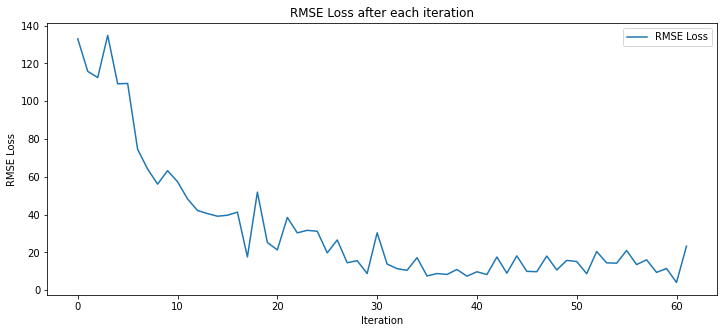

In [46]:
# loss for iterations
plt.plot(lstm_model.iteration_loss, label="RMSE Loss")
plt.title("RMSE Loss after each iteration")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("RMSE Loss")
plt.rcParams["legend.loc"] = 'upper right'

### Pick One Data Point

In [72]:
import torch.nn.functional as F

# for example, pick the No.54 participant
participant_i = 50
prediction, label, loss = lstm_model.evaluate(participant_i)
print(loss)
print(prediction, label)
print(torch.mean(prediction))


tensor(22.9835)
tensor([[103.2509],
        [109.9129],
        [ 42.3693],
        ...,
        [119.0676],
        [122.6203],
        [114.3494]]) tensor([100.])
tensor(122.1191)


No handles with labels found to put in legend.


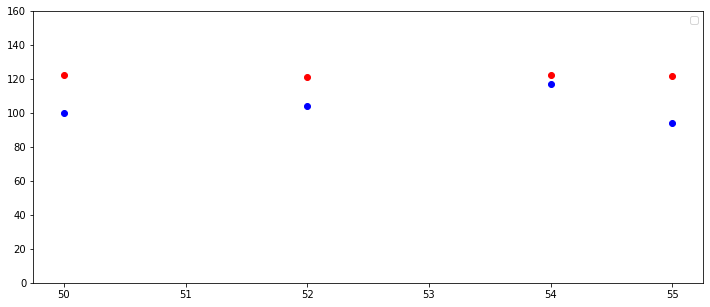

In [94]:
plt.ylim(0, 160)
for j in range(50, 58):
    pred, label, _ = lstm_model.evaluate(j)

    if isinstance(pred, int) and pred == -1:
        continue

    # plot the prediction vs. the label
    plt.plot(j, torch.mean(pred).item(), marker="o", color="red")
    plt.plot(j, label, marker="o", color="blue")


plt.legend()
plt.show()

Yes indeed, I could get the eye_tracker data from the data loader, but it seems this is not directly usable for training beacuse either the number of the training file for each one is different or the content of the participant is different.
And in the testing of each participant, the content also not the same.
So, only one LSTM model should not be able to handle different people and tasks.

**In the following, I would choose to use Linear Regression model instead of LSTM model to predict the empathy score.**

## Simple Linear Models on the Questionnaire Data

In [ ]:
from sklearn.model_selection import train_test_split

# get the labels
def get_questionnaire_dataset(dirname="./dataset/", ):

    # get the questionnaire A
    filename_a = "Questionnaire_datasetIA.csv"
    with open(dirname + filename_a, 'r', encoding="ISO-8859-1") as f:
        df_questionnaire_datasetA = pd.read_csv(f)

    # get the questionnaire B
    filename_b = "Questionnaire_datasetIB.csv"
    with open(dirname + filename_b, 'r', encoding="ISO-8859-1") as f:
        df_questionnaire_datasetB = pd.read_csv(f)
    
    # combine the two questionnaire datasets
    df_combined_questionnaire_dataset = pd.concat([df_questionnaire_datasetA, df_questionnaire_datasetB], axis=0)

    return df_combined_questionnaire_dataset

def extract_X_y(df_dataset):
    return df_dataset.iloc[:, 6:46].to_numpy(), df_dataset.iloc[:, 46].to_numpy()


def get_train_test_data_XY(train=False, test=False):

    if train or test:
        data_set = get_questionnaire_dataset()
        data_set.fillna(data_set.mean(), inplace=True)
        # split the dataset into train and test, with train : test = 8 : 2
        train_set, test_set = train_test_split(data_set, test_size=0.3, random_state=42)

        if train and not test:
            trainX, trainY = extract_X_y(train_set)
            return trainX, trainY

        if test and not train:
            testX, testY = extract_X_y(test_set)
            return testX, testY
        
        if train and test:
            trainX, trainY = extract_X_y(train_set)
            testX, testY = extract_X_y(test_set)
            return (trainX, trainY, testX, testY)

        # assert the trainX and testX have the same length
        # assert (trainX.shape[1] == testX.shape[1])
    else:
        return None

trainX, trainY, testX, testY = get_train_test_data_XY(train=True, test=True)


## Define the Metric and Plot for Evaluating the Models

In [ ]:
# this will be used into the following evaluation
# for two metrics, Rooted Mean Square Error (RSME) and the R^2 score.
global_metric = {
    "models": set(),
    "RMSE": [],
    "R2": []
}

In [ ]:
from sklearn.metrics import mean_squared_error


def save_metric_to_global(model, rmse, r2):

    # Since each model is only evaluated only once on the test set,
    # the model name is used as a key for the set
    model_name = model.__class__.__name__
    if model_name not in global_metric["models"]:
        global_metric["models"].add(model_name)
        global_metric['RMSE'].append((model_name, rmse))
        global_metric['R2'].append((model_name, r2))


def metric(model, X, Y):

    y_pred = model.predict(X)

    rmse = np.sqrt(mean_squared_error(y_pred, Y))
    r2_score = model.score(X, Y)

    save_metric_to_global(model, rmse, r2=r2_score)

    print("The model's RMSE: {:.4f}".format(rmse))
    print("The model's R^2 score: {:.4f}".format(r2_score))

    # add scores into global metric


def plot_pred_vs_label(model, X, y, train=True):

    # Customize plot style
    # the style of the reference page: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

    # the meaning of the code could be simply inferred by its name or attribute
    plt.style.use('seaborn-whitegrid')
    plt.rcParams['axes.edgecolor'] = 'gray'
    plt.rcParams['axes.facecolor'] = '#F5F5F5'
    plt.rcParams['axes.labelcolor'] = 'gray'

    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.5
    plt.rcParams['grid.linestyle'] = '--'
    plt.rcParams['grid.color'] = 'gray'
    plt.rcParams['lines.linewidth'] = 2
    plt.rcParams['lines.solid_capstyle'] = 'round'

    plt.rcParams['xtick.color'] = 'gray'
    plt.rcParams['ytick.color'] = 'gray'

    plt.rcParams['text.color'] = 'gray'
    plt.rcParams['font.family'] = 'serif'

    dataset = ""
    if train:
        dataset = "Training Set"
    else:
        dataset = "Test Set"

    title = f'{model.__class__.__name__} Model Performance - Actual vs Predicted on {dataset}'
    print(f'Figure:\n{title}.')
 

    # the figure size set up
    plt.figure(figsize=(10, 5))

    # plot for the label
    plt.plot(range(0, len(X)), y, color='green', label='Actual', alpha=0.8)

    y_pred = model.predict(X)
    plt.plot(range(0, len(X)), y_pred, color='orange', label='Predicted', alpha=0.8)

    plt.legend(frameon=True, edgecolor='gray', facecolor='#F5F5F5', framealpha=1, loc='lower left')

    plt.title(title)
    plt.ylabel('The Empathy Score')
    plt.xlabel('The Participant Index')

    plt.show()


def plot_global_metric():

    # Customize plot style
    # the style of the reference page: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

    # the meaning of the code could be simply inferred by its name or attribute
    plt.style.use('seaborn-whitegrid')
    plt.rcParams['axes.edgecolor'] = 'gray'
    plt.rcParams['axes.facecolor'] = '#F5F5F5'
    plt.rcParams['axes.labelcolor'] = 'gray'

    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.5
    plt.rcParams['grid.linestyle'] = '--'
    plt.rcParams['grid.color'] = 'gray'
    plt.rcParams['lines.linewidth'] = 1.2
    plt.rcParams['lines.solid_capstyle'] = 'round'

    plt.rcParams['xtick.color'] = 'gray'
    plt.rcParams['ytick.color'] = 'gray'

    plt.rcParams['text.color'] = 'gray'
    plt.rcParams['font.family'] = 'serif'

    title = 'All Model RSME and R2 Scores'

    # the figure size set up
    plt.figure(figsize=(10, 5))

    # for i, each in enumerate(global_metric["RMSE"]):
    #     model_name = each[0]
    #     score = each[1]
    #     print(score)
    plt.plot(data=global_metric["RMSE"], alpha=0.8)


    plt.legend(frameon=True, edgecolor='gray', facecolor='#F5F5F5', framealpha=1, loc='lower left')

    plt.title(title)
    plt.ylabel('The Score')
    plt.xlabel('Models')

    plt.show()



In [ ]:
# accept the model's class and its arguments
# and evaluate the training performance with plot and metric
# return the trained model
def pipeline(args, plot=True):

    # no data is provided
    model, X, Y = None, None, None

    train = False

    # for training
    if (isinstance(args, dict)) and ("class" in args):

        train = True

        model_class = args["class"]
        del args["class"]
        X, Y = get_train_test_data_XY(train=True)

        # init the model
        model = model_class(**args)
        model.fit(X, Y)
    # for evaluating
    else:
        # get the model from the args
        model = args
        X, Y = get_train_test_data_XY(test=True)


    metric(model, X, Y) # print metric information
    if plot:
        plot_pred_vs_label(model, X, Y, train)

    return model


The model's RMSE: 5.9458
The model's R^2 score: 0.8957
Figure:
LinearRegression Model Performance - Actual vs Predicted on Training Set.


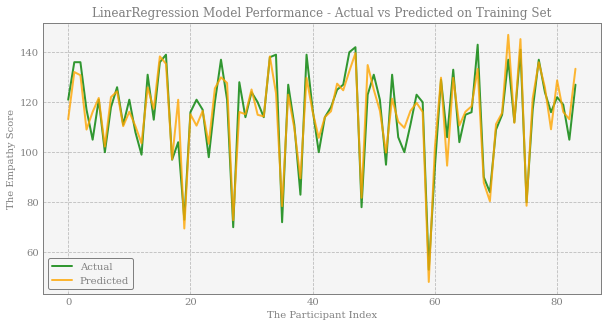

In [ ]:
from sklearn.linear_model import LinearRegression

# setting up args while initializing the linear regression model
lr_args = {
    "class": LinearRegression,
    "fit_intercept": True,
    "normalize": True, # 
    "n_jobs": 4,
}

lr_trained = pipeline(lr_args)


## Performance on the testing set for Linear Regression Model

The model's RMSE: 11.1002
The model's R^2 score: 0.6030
Figure:
LinearRegression Model Performance - Actual vs Predicted on Test Set.


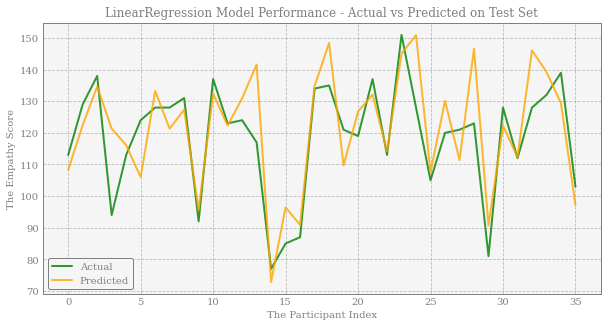

LinearRegression(n_jobs=4, normalize=True)

In [ ]:
# when the incomming arugment is a single model instance,
# the pipeline automatically recognize it as a trained model
pipeline(lr_trained)

## Linear least squares with l2 regularization.
Now let's try to use the linear regression model with l2 regularization to see if the performance could be improved.

The model's RMSE: 5.9626
The model's R^2 score: 0.8951
Figure:
Ridge Model Performance - Actual vs Predicted on Training Set.


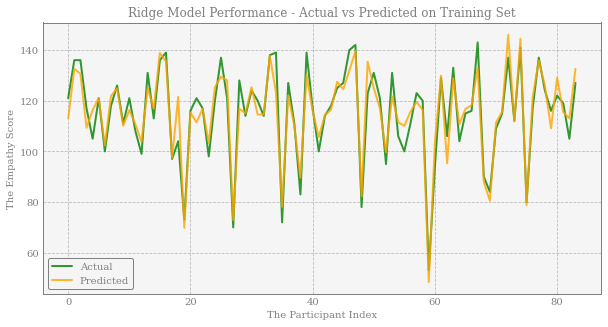

In [ ]:
from sklearn.linear_model import Ridge

rd_args = {
    "class": Ridge,
    "alpha": 1.05,
    # "normalize": True
}

rd_trained = pipeline(rd_args)

The model's RMSE: 10.3575
The model's R^2 score: 0.6543
Figure:
Ridge Model Performance - Actual vs Predicted on Test Set.


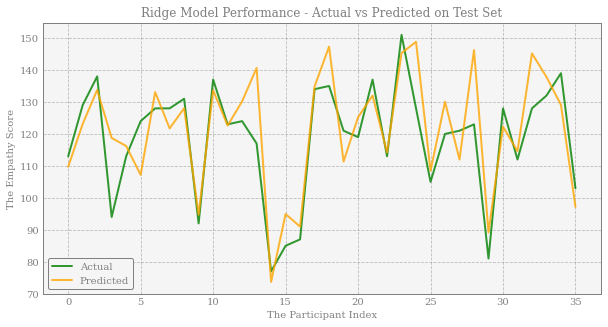

Ridge(alpha=1.05)

In [ ]:
pipeline(rd_trained)

The model's RMSE: 3.8840
The model's R^2 score: 0.9555
Figure:
RandomForestRegressor Model Performance - Actual vs Predicted on Training Set.


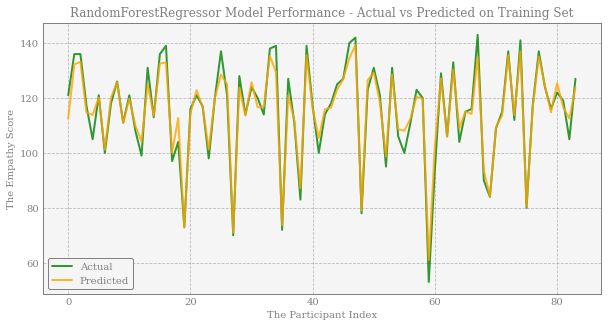

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_args = {
    "class": RandomForestRegressor,
    "n_estimators": 1000,
    "max_depth": 10,
    "random_state": 42,
    "n_jobs": 10,
}

rf_trained = pipeline(rf_args)

The model's RMSE: 8.2969
The model's R^2 score: 0.7782
Figure:
RandomForestRegressor Model Performance - Actual vs Predicted on Test Set.


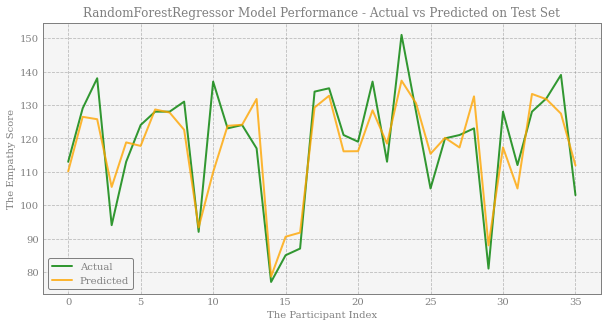

RandomForestRegressor(max_depth=10, n_estimators=1000, n_jobs=10,
                      random_state=42)

In [ ]:
pipeline(rf_trained)